In [10]:
%matplotlib inline

import time
import networkx as nx
from networkx import draw_graphviz

# Shortest Paths

最短経路問題を扱う。  
ここでは以下の三通りの解法を取り扱う。  
1 Quant Econの方法  
2 ベルマンフォード法  
3 ダイクストラ法  
4 ワーシャルフロイド法  

## 1. Quant Econの方法

### 1.1 Outline of the Problem

The standard algorithm for finding J  is to start with  
$J_0(v) = M \text{ if } v \not= destination, ~~else ~J_0(v(=destination)) = 0$  
Jのindexは試行回数と考えれば良い。  
Mは大きな数字を適当に入れる。  
<アルゴリズム>  
Set n = 0  
Set $J_{n+1} (v) = \min_{w \in F_v} \{ c(v, w) + J_n(w) \}$ for all v.  
If $J_{n+1}$ and $J_n$ are not equal then increment n, go to 2.

J(v)はノードvからの最小コストの道のりを示している。

とりあえずその時点で与えられた経路を使う。  
点vから次の点へ移る経路を選ぶ。それはその経路を選んだ時に最終地点へのコストが最小化されるように選ぶ。
$\min_{w\in F_v} \{ c(v, w) + J(w)\} $

例えば下の図の場合、Aにいるとして、J(C)=3、J(D)=5、J(B)=10であるので、c(A,C)(=5)+J(C)=8、c(A,D)(=3)+J(D)=8より、次はCかDに移る。

![shortestpaths](graph.png)

### 1.2 課題のグラフ

問題であるグラフのファイルを作成する。  
最初のnodeが始点、それ以降が'移るnode, 距離'である。

In [11]:
%%file graph.txt
node0, node1 0.04, node8 11.11, node14 72.21
node1, node46 1247.25, node6 20.59, node13 64.94
node2, node66 54.18, node31 166.80, node45 1561.45
node3, node20 133.65, node6 2.06, node11 42.43
node4, node75 3706.67, node5 0.73, node7 1.02
node5, node45 1382.97, node7 3.33, node11 34.54
node6, node31 63.17, node9 0.72, node10 13.10
node7, node50 478.14, node9 3.15, node10 5.85
node8, node69 577.91, node11 7.45, node12 3.18
node9, node70 2454.28, node13 4.42, node20 16.53
node10, node89 5352.79, node12 1.87, node16 25.16
node11, node94 4961.32, node18 37.55, node20 65.08
node12, node84 3914.62, node24 34.32, node28 170.04
node13, node60 2135.95, node38 236.33, node40 475.33
node14, node67 1878.96, node16 2.70, node24 38.65
node15, node91 3597.11, node17 1.01, node18 2.57
node16, node36 392.92, node19 3.49, node38 278.71
node17, node76 783.29, node22 24.78, node23 26.45
node18, node91 3363.17, node23 16.23, node28 55.84
node19, node26 20.09, node20 0.24, node28 70.54
node20, node98 3523.33, node24 9.81, node33 145.80
node21, node56 626.04, node28 36.65, node31 27.06
node22, node72 1447.22, node39 136.32, node40 124.22
node23, node52 336.73, node26 2.66, node33 22.37
node24, node66 875.19, node26 1.80, node28 14.25
node25, node70 1343.63, node32 36.58, node35 45.55
node26, node47 135.78, node27 0.01, node42 122.00
node27, node65 480.55, node35 48.10, node43 246.24
node28, node82 2538.18, node34 21.79, node36 15.52
node29, node64 635.52, node32 4.22, node33 12.61
node30, node98 2616.03, node33 5.61, node35 13.95
node31, node98 3350.98, node36 20.44, node44 125.88
node32, node97 2613.92, node34 3.33, node35 1.46
node33, node81 1854.73, node41 3.23, node47 111.54
node34, node73 1075.38, node42 51.52, node48 129.45
node35, node52 17.57, node41 2.09, node50 78.81
node36, node71 1171.60, node54 101.08, node57 260.46
node37, node75 269.97, node38 0.36, node46 80.49
node38, node93 2767.85, node40 1.79, node42 8.78
node39, node50 39.88, node40 0.95, node41 1.34
node40, node75 548.68, node47 28.57, node54 53.46
node41, node53 18.23, node46 0.28, node54 162.24
node42, node59 141.86, node47 10.08, node72 437.49
node43, node98 2984.83, node54 95.06, node60 116.23
node44, node91 807.39, node46 1.56, node47 2.14
node45, node58 79.93, node47 3.68, node49 15.51
node46, node52 22.68, node57 27.50, node67 65.48
node47, node50 2.82, node56 49.31, node61 172.64
node48, node99 2564.12, node59 34.52, node60 66.44
node49, node78 53.79, node50 0.51, node56 10.89
node50, node85 251.76, node53 1.38, node55 20.10
node51, node98 2110.67, node59 23.67, node60 73.79
node52, node94 1471.80, node64 102.41, node66 123.03
node53, node72 22.85, node56 4.33, node67 88.35
node54, node88 967.59, node59 24.30, node73 238.61
node55, node84 86.09, node57 2.13, node64 60.80
node56, node76 197.03, node57 0.02, node61 11.06
node57, node86 701.09, node58 0.46, node60 7.01
node58, node83 556.70, node64 29.85, node65 34.32
node59, node90 820.66, node60 0.72, node71 0.67
node60, node76 48.03, node65 4.76, node67 1.63
node61, node98 1057.59, node63 0.95, node64 4.88
node62, node91 132.23, node64 2.94, node76 38.43
node63, node66 4.43, node72 70.08, node75 56.34
node64, node80 47.73, node65 0.30, node76 11.98
node65, node94 594.93, node66 0.64, node73 33.23
node66, node98 395.63, node68 2.66, node73 37.53
node67, node82 153.53, node68 0.09, node70 0.98
node68, node94 232.10, node70 3.35, node71 1.66
node69, node99 247.80, node70 0.06, node73 8.99
node70, node76 27.18, node72 1.50, node73 8.37
node71, node89 104.50, node74 8.86, node91 284.64
node72, node76 15.32, node84 102.77, node92 133.06
node73, node83 52.22, node76 1.40, node90 243.00
node74, node81 1.07, node76 0.52, node78 8.08
node75, node92 68.53, node76 0.81, node77 1.19
node76, node85 13.18, node77 0.45, node78 2.36
node77, node80 8.94, node78 0.98, node86 64.32
node78, node98 355.90, node81 2.59
node79, node81 0.09, node85 1.45, node91 22.35
node80, node92 121.87, node88 28.78, node98 264.34
node81, node94 99.78, node89 39.52, node92 99.89
node82, node91 47.44, node88 28.05, node93 11.99
node83, node94 114.95, node86 8.75, node88 5.78
node84, node89 19.14, node94 30.41, node98 121.05
node85, node97 94.51, node87 2.66, node89 4.90
node86, node97 85.09
node87, node88 0.21, node91 11.14, node92 21.23
node88, node93 1.31, node91 6.83, node98 6.12
node89, node97 36.97, node99 82.12
node90, node96 23.53, node94 10.47, node99 50.99
node91, node97 22.17
node92, node96 10.83, node97 11.24, node99 34.68
node93, node94 0.19, node97 6.71, node99 32.77
node94, node98 5.91, node96 2.03
node95, node98 6.17, node99 0.27
node96, node98 3.32, node97 0.43, node99 5.87
node97, node98 0.30
node98, node99 0.33
node99, 

Overwriting graph.txt


### 1.3 問題を解くために必要なコードの作成
コードはQuantEcon内のものをそのまま使用。

・read_graph関数  
ファイルを開いて、ある点からある点までの距離を格納する辞書を作成する関数。  

・update_J関数  
ベルマンオペレーターの関数。ここではある点からある点への距離をより短くする組み合わせの辞書を返している。  

・print_best_path関数  
最良の経路をprintする関数。この関数は最良の経路を探索するのではなく、すでに求められた最良の経路の組み合わせ（辞書で与えられている）から、見やすい形で最短経路への道順を表示するもの。

In [12]:
def read_graph(in_file):
    """ Read in the graph from the data file.  The graph is stored
    as a dictionary, where the keys are the nodes, and the values
    are a list of pairs (d, c), where d is a node and c is a number.
    If (d, c) is in the list for node n, then d can be reached from
    n at cost c.
    """
    graph = {}
    #グラフに関するファイルを開く。
    infile = open(in_file)
    for line in infile:
        #文字列を　','で分割する。列ごとに呼び出され、列ごとに「,」で分割されたものがリストに格納される。
        elements = line.split(',')
        #始点となるnodeを押し出す。
        node = elements.pop(0)
        #nodeをキーとして、要素を[]とするものを辞書に加える。
        graph[node] = []
        
        #nodeが終点でない限り。
        if node != 'node99':
            #'node　cost'が呼び出される。
            for element in elements:
                destination, cost = element.split()
                #print(type(cost))をするとわかるが、costはstr型である。float型に変換してnodeキーに格納。
                graph[node].append((destination.strip(), float(cost)))
    infile.close()
    return graph

def update_J(J, graph):
    "The Bellman operator."
    next_J = {}
    for node in graph:
        #終点なら。
        if node == 'node99':
            #'node99'キーに0を入れる。
            next_J[node] = 0
        else:
            #graph[node]に格納されている要素のなかで、cost + J[dest]が最小となるものを選ぶ。
            next_J[node] = min(cost + J[dest] for dest, cost in graph[node])
    return next_J

def print_best_path(J, graph):
    """ Given a cost-to-go function, computes the best path.  At each node n, 
    the function prints the current location, looks at all nodes that can be 
    reached from n, and moves to the node m which minimizes c + J[m], where c 
    is the cost of moving to m.
    """
    sum_costs = 0
    current_location = 'node0'
    while current_location != 'node99':
        print(current_location)
        running_min = 1e100  # Any big number
        for destination, cost in graph[current_location]:
            cost_of_path = cost + J[destination]
            if cost_of_path < running_min:
                running_min = cost_of_path
                minimizer_cost = cost
                minimizer_dest = destination
        current_location = minimizer_dest
        sum_costs += minimizer_cost

    print('node99\n')
    print('Cost: ', sum_costs)

### ※付記① コードの説明 

In [13]:
infile = open("graph.txt")
for line in infile:
    print(line)

node0, node1 0.04, node8 11.11, node14 72.21

node1, node46 1247.25, node6 20.59, node13 64.94

node2, node66 54.18, node31 166.80, node45 1561.45

node3, node20 133.65, node6 2.06, node11 42.43

node4, node75 3706.67, node5 0.73, node7 1.02

node5, node45 1382.97, node7 3.33, node11 34.54

node6, node31 63.17, node9 0.72, node10 13.10

node7, node50 478.14, node9 3.15, node10 5.85

node8, node69 577.91, node11 7.45, node12 3.18

node9, node70 2454.28, node13 4.42, node20 16.53

node10, node89 5352.79, node12 1.87, node16 25.16

node11, node94 4961.32, node18 37.55, node20 65.08

node12, node84 3914.62, node24 34.32, node28 170.04

node13, node60 2135.95, node38 236.33, node40 475.33

node14, node67 1878.96, node16 2.70, node24 38.65

node15, node91 3597.11, node17 1.01, node18 2.57

node16, node36 392.92, node19 3.49, node38 278.71

node17, node76 783.29, node22 24.78, node23 26.45

node18, node91 3363.17, node23 16.23, node28 55.84

node19, node26 20.09, node20 0.24, node28 70.54

no

### 1.3 ある点からある点までの距離の初期化

※「辞書」という概念をつかいます。  
※ 1e10は1×(10の10乗)という意味です。

In [14]:
2e2

200.0

In [15]:
graph = read_graph('graph.txt')
#ある点から次の点への距離（コスト）が記録されている。
#10の10乗。
M = 1e10
#Jはある点と、その点から最終地点までの距離の組み合わせを格納する辞書。
J = {}
for node in graph:
    J[node] = M
J['node99'] = 0

In [16]:
print(graph)

{'node57': [('node86', 701.09), ('node58', 0.46), ('node60', 7.01)], 'node5': [('node45', 1382.97), ('node7', 3.33), ('node11', 34.54)], 'node32': [('node97', 2613.92), ('node34', 3.33), ('node35', 1.46)], 'node47': [('node50', 2.82), ('node56', 49.31), ('node61', 172.64)], 'node99': [], 'node41': [('node53', 18.23), ('node46', 0.28), ('node54', 162.24)], 'node6': [('node31', 63.17), ('node9', 0.72), ('node10', 13.1)], 'node2': [('node66', 54.18), ('node31', 166.8), ('node45', 1561.45)], 'node33': [('node81', 1854.73), ('node41', 3.23), ('node47', 111.54)], 'node39': [('node50', 39.88), ('node40', 0.95), ('node41', 1.34)], 'node43': [('node98', 2984.83), ('node54', 95.06), ('node60', 116.23)], 'node27': [('node65', 480.55), ('node35', 48.1), ('node43', 246.24)], 'node0': [('node1', 0.04), ('node8', 11.11), ('node14', 72.21)], 'node20': [('node98', 3523.33), ('node24', 9.81), ('node33', 145.8)], 'node1': [('node46', 1247.25), ('node6', 20.59), ('node13', 64.94)], 'node50': [('node85', 2

#### ※辞書には順番がない。  
[参考](http://docs.python.jp/2/tutorial/datastructures.html#tut-dictionaries)

順序を気にするのであればOrderedDict()という関数がある。

In [142]:
from collections import OrderedDict

def read_graph2(in_file):
    """ Read in the graph from the data file.  The graph is stored
    as a dictionary, where the keys are the nodes, and the values
    are a list of pairs (d, c), where d is a node and c is a number.
    If (d, c) is in the list for node n, then d can be reached from
    n at cost c.
    """
    graph = OrderedDict()
    #グラフに関するファイルを開く。
    infile = open(in_file)
    for line in infile:
        #文字列を　','で分割する。列ごとに呼び出され、列ごとに「,」で分割されたものがリストに格納される。
        elements = line.split(',')
        #始点となるnodeを押し出す。
        node = elements.pop(0)
        #nodeをキーとして、要素を[]とするものを辞書に加える。
        graph[node] = []
        
        #nodeが終点でない限り。
        if node != 'node99':
            #'node　cost'が呼び出される。
            for element in elements:
                destination, cost = element.split()
                #print(type(cost))をするとわかるが、costはstr型である。float型に変換してnodeキーに格納。
                graph[node].append((destination.strip(), float(cost)))
    #無くてもいいんだけどちゃんと閉じましょう(なぜ)。
    infile.close()
    return graph

graph = read_graph2('graph.txt')
#見てわかるように、ある点から次の点への距離（コスト）が記録されている。
print(graph)
#10の10乗。
M = 1e10
#Jはある点と、その点から最終地点までの距離。

d = OrderedDict()
for node in graph:
    d[node] = M
d['node99'] = 0
print(d)

K = {}
for node in graph:
    K[node] = M
K['node99'] = 0
print(K)

OrderedDict([('node0', [('node1', 0.04), ('node8', 11.11), ('node14', 72.21)]), ('node1', [('node46', 1247.25), ('node6', 20.59), ('node13', 64.94)]), ('node2', [('node66', 54.18), ('node31', 166.8), ('node45', 1561.45)]), ('node3', [('node20', 133.65), ('node6', 2.06), ('node11', 42.43)]), ('node4', [('node75', 3706.67), ('node5', 0.73), ('node7', 1.02)]), ('node5', [('node45', 1382.97), ('node7', 3.33), ('node11', 34.54)]), ('node6', [('node31', 63.17), ('node9', 0.72), ('node10', 13.1)]), ('node7', [('node50', 478.14), ('node9', 3.15), ('node10', 5.85)]), ('node8', [('node69', 577.91), ('node11', 7.45), ('node12', 3.18)]), ('node9', [('node70', 2454.28), ('node13', 4.42), ('node20', 16.53)]), ('node10', [('node89', 5352.79), ('node12', 1.87), ('node16', 25.16)]), ('node11', [('node94', 4961.32), ('node18', 37.55), ('node20', 65.08)]), ('node12', [('node84', 3914.62), ('node24', 34.32), ('node28', 170.04)]), ('node13', [('node60', 2135.95), ('node38', 236.33), ('node40', 475.33)]), (

順番通りに格納されている。

### 1.4 繰り返し計算でベストな経路を導出する

繰り返しの結果、Jが更新されなくなったらそれが最良。

In [143]:
#条件式が成り立つあいだループ。
n=0
while 1:
    next_J = update_J(J, graph)
    if next_J == J:
        break
    else:
        J = next_J
        n+=1
print_best_path(J, graph)
print(n)

node0
node8
node11
node18
node23
node33
node41
node53
node56
node57
node60
node67
node70
node73
node76
node85
node87
node88
node93
node94
node96
node97
node98
node99

Cost:  160.55000000000007
25


25回の試行で最短経路を導けた。

### ※ networkxを用いてグラフを作ってみる
本節とは関係ないが今後の参考のために。

In [144]:
%matplotlib inline
import pylab
import networkx as nx
import matplotlib.pyplot as plt

In [145]:
graph = nx.DiGraph()

In [146]:
def make_graph(in_file, graph):
    infile = open(in_file)
    for line in infile:
        elements = line.split(',')
        node = elements.pop(0)
        
        if node != 'node99':
            for element in elements:
                destination, cost = element.split()
                graph.add_edge(node, destination, weight=cost)
    infile.close()
    return graph

In [147]:
make_graph('graph.txt', graph)

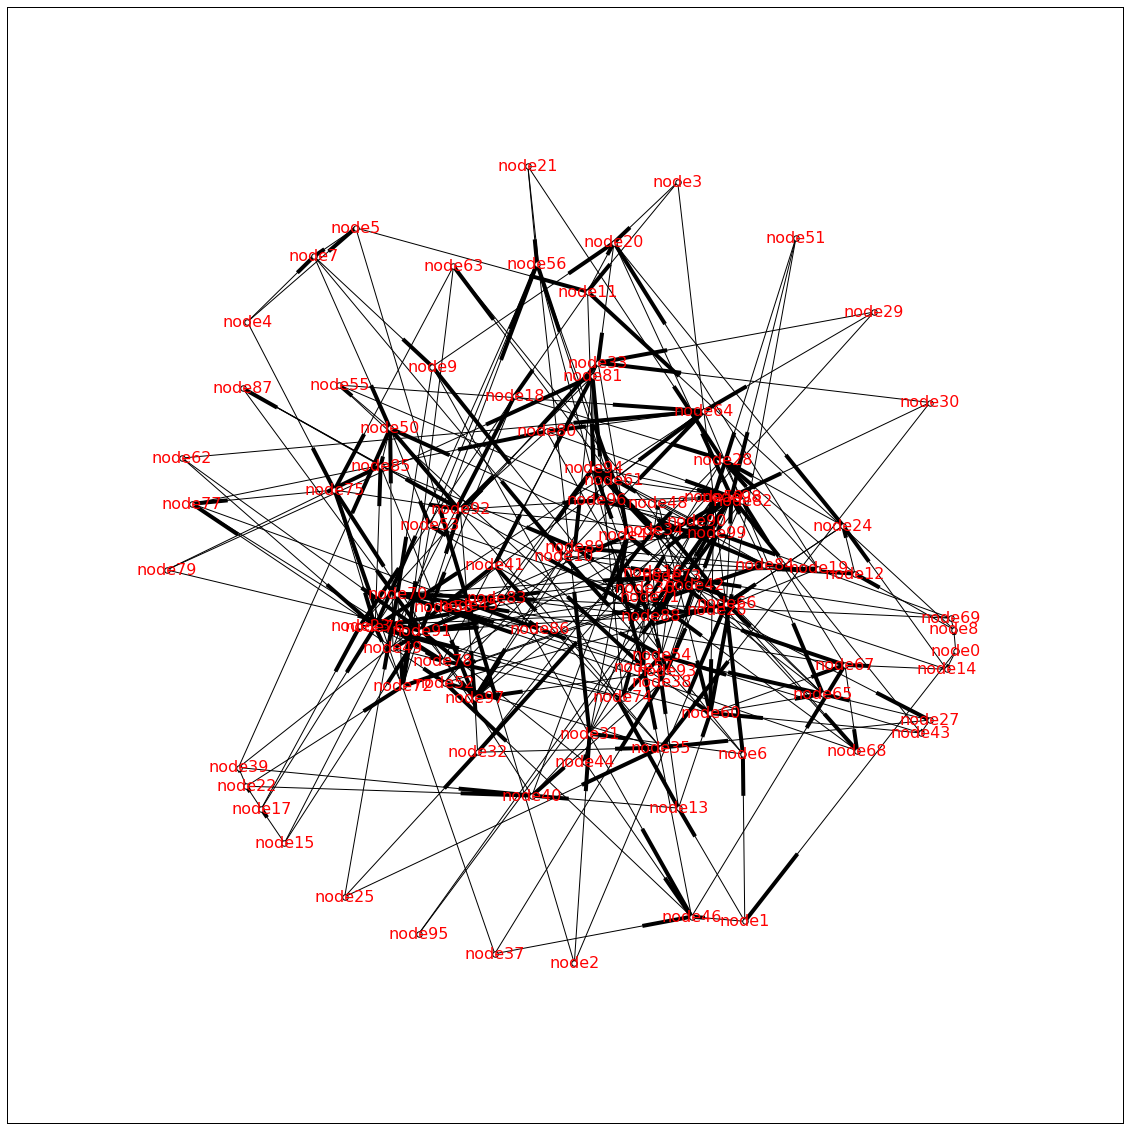

In [148]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph,pos,nodelist=graph.nodes(),node_size=30, node_color="w")
nx.draw_networkx_edges(graph,pos,edgelist=graph.edges())
nx.draw_networkx_labels(graph, pos, font_size=16, font_color="r")

pylab.xticks([])
pylab.yticks([])

pylab.show()
pylab.savefig("graph_networkx.png")

## 2. ベルマンフォード法  
QuanEconもベルマンフォード法だが、よりオーソドックスな方法で実装した。

In [154]:
graph = read_graph('graph.txt')

In [151]:
def bellman_ford(graph):
    inf = float("inf")
    d = {}
    for node in graph:
        if node == 'node0':
            d[node] = 0
        else:
            d[node] = inf
            

    for i in range(len(graph)):
        # 全ての辺を走査。
        for node in graph:
            #　E回計算。
            for n, e in graph[node]:
                if d[node] != inf and (d[n] > d[node] + e):
                    d[n] = d[node] + e
    return d

In [155]:
bellman_ford(graph)

{'node0': 0,
 'node1': 0.04,
 'node10': 33.73,
 'node11': 18.56,
 'node12': 14.29,
 'node13': 25.769999999999996,
 'node14': 72.21,
 'node15': inf,
 'node16': 58.89,
 'node17': inf,
 'node18': 56.11,
 'node19': 62.38,
 'node2': inf,
 'node20': 37.879999999999995,
 'node21': inf,
 'node22': inf,
 'node23': 72.34,
 'node24': 47.69,
 'node25': inf,
 'node26': 49.489999999999995,
 'node27': 49.49999999999999,
 'node28': 61.94,
 'node29': inf,
 'node3': inf,
 'node30': inf,
 'node31': 83.8,
 'node32': inf,
 'node33': 94.71000000000001,
 'node34': 83.72999999999999,
 'node35': 97.6,
 'node36': 77.46,
 'node37': inf,
 'node38': 262.1,
 'node39': inf,
 'node4': inf,
 'node40': 263.89000000000004,
 'node41': 97.94000000000001,
 'node42': 135.25,
 'node43': 295.74,
 'node44': 209.68,
 'node45': inf,
 'node46': 98.22000000000001,
 'node47': 145.33,
 'node48': 213.17999999999998,
 'node49': inf,
 'node5': inf,
 'node50': 148.15,
 'node51': inf,
 'node52': 115.16999999999999,
 'node53': 116.1700000

## 3. ダイクストラ法

ベルマンフォード法と並んでよく使われる最短経路導出の方法。  
ベルマンフォード法より計算量は少ないが、コストに負値を許さない。

In [156]:
def dijkstra(graph):
    inf = float("inf")
    d = {}
    prev = {}
    Q = {}
    
    for node in graph:
        if node == 'node0':
            d[node] = 0
        else:
            d[node] = inf
        prev[node] = float("nan") 
        Q[node] = (d[node])
        
    while len(Q) > 0:
        u = max([(c, n) for n,c in Q.items()])[1]
        Q.pop(u)
        for n, c  in graph[u]:
            for i in range(len(node)):
                alt = d[u] + c
                if d[n] > alt:
                    d[n] = alt
                    prev[n] = u
                    Q[n] = alt
    return d

In [157]:
dijkstra(graph)

{'node0': 0,
 'node1': 0.04,
 'node10': 33.73,
 'node11': 18.56,
 'node12': 14.29,
 'node13': 25.769999999999996,
 'node14': 72.21,
 'node15': inf,
 'node16': 58.89,
 'node17': inf,
 'node18': 56.11,
 'node19': 62.38,
 'node2': inf,
 'node20': 37.879999999999995,
 'node21': inf,
 'node22': inf,
 'node23': 72.34,
 'node24': 47.69,
 'node25': inf,
 'node26': 49.489999999999995,
 'node27': 49.49999999999999,
 'node28': 61.94,
 'node29': inf,
 'node3': inf,
 'node30': inf,
 'node31': 83.8,
 'node32': inf,
 'node33': 94.71000000000001,
 'node34': 83.72999999999999,
 'node35': 97.6,
 'node36': 77.46,
 'node37': inf,
 'node38': 262.1,
 'node39': inf,
 'node4': inf,
 'node40': 263.89000000000004,
 'node41': 97.94000000000001,
 'node42': 135.25,
 'node43': 295.74,
 'node44': 209.68,
 'node45': inf,
 'node46': 98.22000000000001,
 'node47': 145.33,
 'node48': 213.17999999999998,
 'node49': inf,
 'node5': inf,
 'node50': 148.15,
 'node51': inf,
 'node52': 115.16999999999999,
 'node53': 116.1700000

## 参考  
1のQuantEconのベルマンフォード法と2のベルマンフォード法と3のダイクストラ法とで実行速度を比較してみる。

In [158]:
start = time.time()

dijkstra(graph)

elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

elapsed_time:0.011998176574707031


In [159]:
start = time.time()

bellman_ford(graph)

elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

elapsed_time:0.00838613510131836


In [160]:
start = time.time()

n=0
while 1:
    next_J = update_J(J, graph)
    if next_J == J:
        break
    else:
        J = next_J
        n+=1

elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

elapsed_time:0.0003509521484375


In [173]:
def update_J(J, graph):
    "The Bellman operator."
    next_J = {}
    for node in graph:
        #終点なら。
        if node == 'node99':
            #'node99'キーに0を入れる。
            next_J[node] = 0
        elif J[node] != inf:
            #graph[node]に格納されている要素のなかで、cost + J[dest]が最小となるものを選ぶ。
            next_J[node] = min(cost + J[dest] for dest, cost in graph[node])
        else:
            next_J[node] = d[node]
    return next_J

inf = float("inf")
J = {}
for node in graph:
    J[node] = inf
J['node99'] = 0

n=0
while 1:
    next_J = update_J(J, graph)
    if next_J == J:
        break
    else:
        J = next_J
        n+=1
print_best_path(J, graph)
print(n)

node0
node8
node11
node18
node23
node33
node41
node53
node56
node57
node60
node67
node70
node73
node76
node85
node87
node88
node93
node94
node96
node97
node98
node99

Cost:  160.55000000000007
26


In [174]:
start = time.time()

n=0
while 1:
    next_J = update_J(J, graph)
    if next_J == J:
        break
    else:
        J = next_J
        n+=1

elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

elapsed_time:0.0005290508270263672
